__Galaxies__

In this example, we'll use 'mass_profiles' and 'light_profiles' modules introduced previously, along with the 'galaxy' module to create Galaxy objects in PyAutoLens. We'll see that:

1) Galaxies can take multiple light-profiles / mass-profiles and are composed of multiple components.

2) By taking multiple components, the combined intensities and deflection angles of the profiles are computed.

In [ ]:
%matplotlib inline

from autolens.model.profiles import light_profiles
from autolens.model.profiles import mass_profiles
from autolens.model.galaxy import galaxy
from autolens.data.array import grids
from autolens.model.galaxy.plotters import galaxy_plotters

Lets use an identical grid to the previous example.

In [2]:
grid_stack = grids.GridStack.from_shape_pixel_scale_and_sub_grid_size(shape=(100, 100), pixel_scale=0.05,
                                                                      sub_grid_size=2)

Lets make a galaxy with a Sersic light profile, by making a Sersic light profile and pasing it to a Galaxy object.

In [3]:
sersic_light_profile = light_profiles.EllipticalSersic(centre=(0.0, 0.0), axis_ratio=0.8, phi=45.0,
                                                       intensity=1.0, effective_radius=1.0, sersic_index=2.5)
galaxy_with_light_profile = galaxy.Galaxy(light=sersic_light_profile)
print(galaxy_with_light_profile)

Redshift: None
Light Profiles:
EllipticalSersic
centre: (0.0, 0.0)
axis_ratio: 0.8
phi: 45.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5


In the previous example, we passed grids to the light-profile module to compute its image. We can do the exact same with galaxies, to again compute the galaxy's image.

In [4]:
galaxy_intensities = galaxy_with_light_profile.intensities_from_grid(grid=grid_stack.regular)
print('intensity of regular-grid pixel 1:')
print(galaxy_intensities[0])
print('intensity of regular-grid pixel 2:')
print(galaxy_intensities[1])
print('intensity of regular-grid pixel 3:')
print(galaxy_intensities[2])
print('etc.')

intensity of regular-grid pixel 1:
0.033686436269567265
intensity of regular-grid pixel 2:
0.03480146593360767
intensity of regular-grid pixel 3:
0.0359526695947356
etc.


A galaxy plotter allows us to the plot the image, just like the profile plotters did for a light profile (again, mapping the 1D image to 2D).

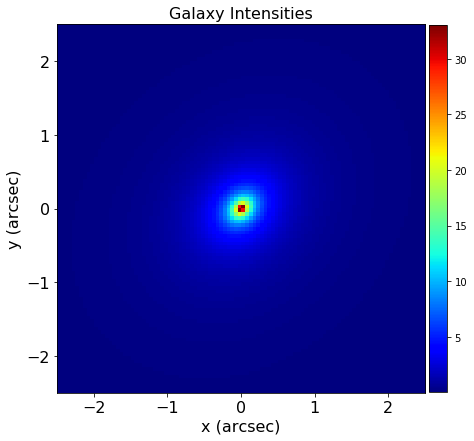

In [5]:
galaxy_plotters.plot_intensities(galaxy=galaxy_with_light_profile, grid=grid_stack.regular)

We can pass galaxies as many profiles as we like. Lets create a galaxy with three light profiles.

In [18]:

light_profile_1 = light_profiles.SphericalSersic(centre=(0.0,  0.0), intensity=1.0, effective_radius=1.0, sersic_index=2.5)
light_profile_2 = light_profiles.SphericalSersic(centre=(1.0,  1.0), intensity=1.0, effective_radius=2.0, sersic_index=3.0)
light_profile_3 = light_profiles.SphericalSersic(centre=(1.0, -1.0), intensity=1.0, effective_radius=2.0, sersic_index=2.0)
galaxy_with_3_light_profiles = galaxy.Galaxy(light_1=light_profile_1, light_2=light_profile_2, light_3=light_profile_3)

print(galaxy_with_3_light_profiles)

Redshift: None
Light Profiles:
SphericalSersic
centre: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 1.0
sersic_index: 2.5
SphericalSersic
centre: (1.0, 1.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 2.0
sersic_index: 3.0
SphericalSersic
centre: (1.0, -1.0)
axis_ratio: 1.0
phi: 0.0
intensity: 1.0
effective_radius: 2.0
sersic_index: 2.0


If we plot the galaxy, we see 3 blobs of light!

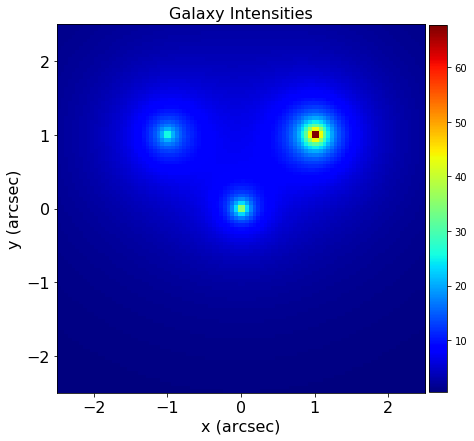

In [11]:
galaxy_plotters.plot_intensities(galaxy=galaxy_with_3_light_profiles, grid=grid_stack.regular)

We can also plot each individual light profile using the 'subplot' galaxy plotter.

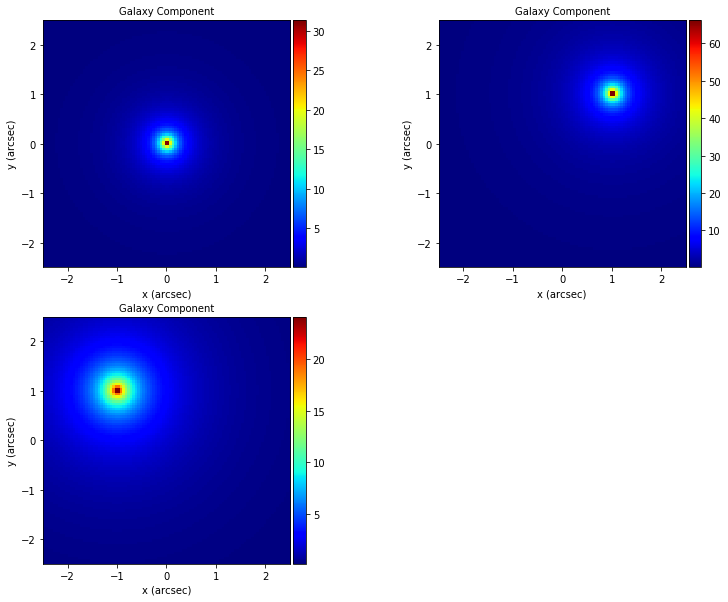

In [12]:
galaxy_plotters.plot_intensities_subplot(galaxy=galaxy_with_3_light_profiles, grid=grid_stack.regular)

Mass profiles interact with Galaxy objects in the exact same way as light profiles. Lets create a galaxy with three SIS mass profiles. 

In [13]:
mass_profile_1 = mass_profiles.SphericalIsothermal(centre=(0.0,  0.0), einstein_radius=1.0)
mass_profile_2 = mass_profiles.SphericalIsothermal(centre=(1.0,  1.0), einstein_radius=1.0)
mass_profile_3 = mass_profiles.SphericalIsothermal(centre=(1.0, -1.0), einstein_radius=1.0)
galaxy_with_3_mass_profiles = galaxy.Galaxy(mass_1=mass_profile_1, mass_2=mass_profile_2, mass_3=mass_profile_3)

print(galaxy_with_3_mass_profiles)

Redshift: None
Mass Profiles:
SphericalIsothermal
centre: (0.0, 0.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphericalIsothermal
centre: (1.0, 1.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0
SphericalIsothermal
centre: (1.0, -1.0)
axis_ratio: 1.0
phi: 0.0
einstein_radius: 1.0
slope: 2.0
core_radius: 0.0


We can use a galaxy plotter to plot these deflection angles. (Deflection angles of mass-profiles add together just like the light-profile image's above)

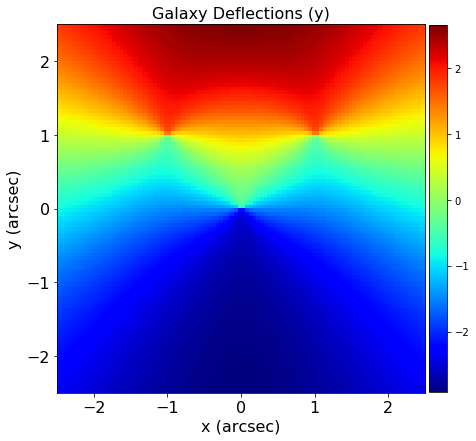

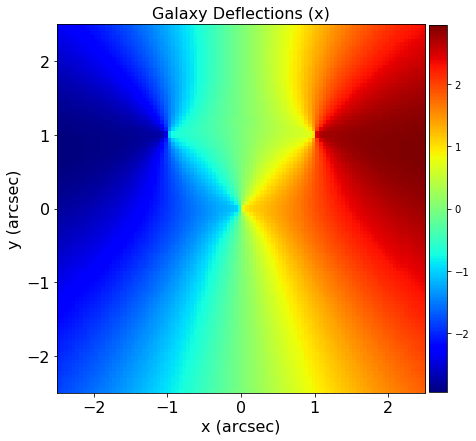

In [14]:
galaxy_plotters.plot_deflections_y(galaxy=galaxy_with_3_mass_profiles, grid=grid_stack.regular)
galaxy_plotters.plot_deflections_x(galaxy=galaxy_with_3_mass_profiles, grid=grid_stack.regular)

I wonder what 3 summed surface density maps or potential's look like ;)

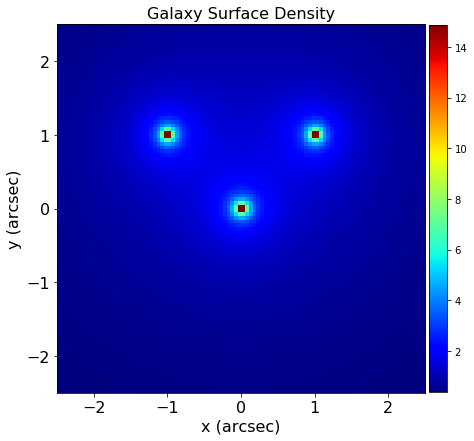

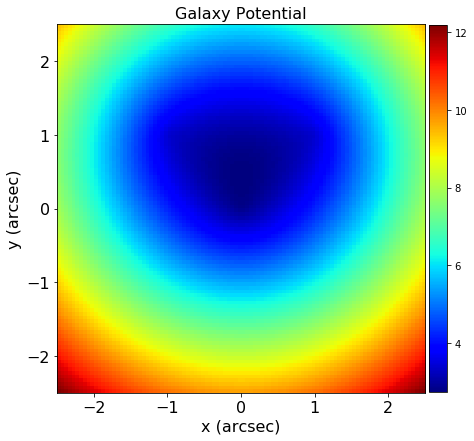

In [15]:
galaxy_plotters.plot_surface_density(galaxy=galaxy_with_3_mass_profiles, grid=grid_stack.regular)
galaxy_plotters.plot_potential(galaxy=galaxy_with_3_mass_profiles, grid=grid_stack.regular)

Finally, a galaxy can take both light and mass profiles, and there is no limit to how many we pass it.

In [16]:
light_profile_1 = light_profiles.SphericalSersic(centre=(0.0, 0.0), intensity=1.0, 
                                                 effective_radius=1.0, sersic_index=1.0)
light_profile_2 = light_profiles.SphericalSersic(centre=(1.0, 1.0), intensity=1.0, 
                                                 effective_radius=2.0, sersic_index=2.0)
light_profile_3 = light_profiles.SphericalSersic(centre=(2.0, 2.0), intensity=1.0, 
                                                 effective_radius=3.0, sersic_index=3.0)
light_profile_4 = light_profiles.EllipticalSersic(centre=(1.0, -1.0), axis_ratio=0.5, phi=45.0, 
                                                  intensity=1.0, effective_radius=1.0, sersic_index=1.0)

mass_profile_1 = mass_profiles.SphericalIsothermal(centre=(0.0, 0.0), einstein_radius=1.0)
mass_profile_2 = mass_profiles.SphericalIsothermal(centre=(1.0, 1.0), einstein_radius=2.0)
mass_profile_3 = mass_profiles.SphericalIsothermal(centre=(2.0, 2.0), einstein_radius=3.0)
mass_profile_4 = mass_profiles.EllipticalIsothermal(centre=(1.0, -1.0), axis_ratio=0.5, phi=45.0, 
                                                   einstein_radius=2.0)

galaxy_with_many_profiles = galaxy.Galaxy(light_1=light_profile_1, light_2=light_profile_2, 
                                          light_3=light_profile_3, light_4=light_profile_4,
                                           mass_1=mass_profile_1, mass_2=mass_profile_2,
                                           mass_3=mass_profile_3, mass_4=mass_profile_4)

Suffice to say, the galaxy's images, surface density, potential and deflections look pretty interesting.

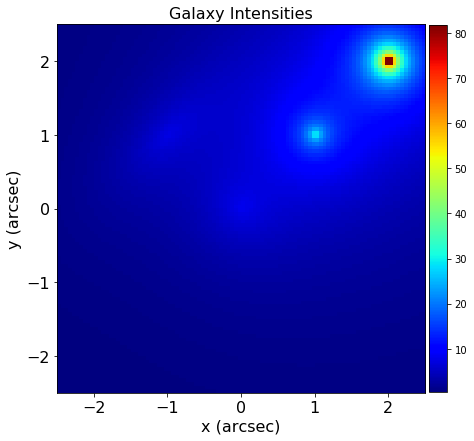

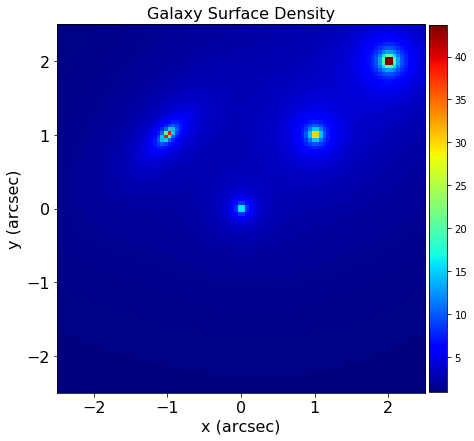

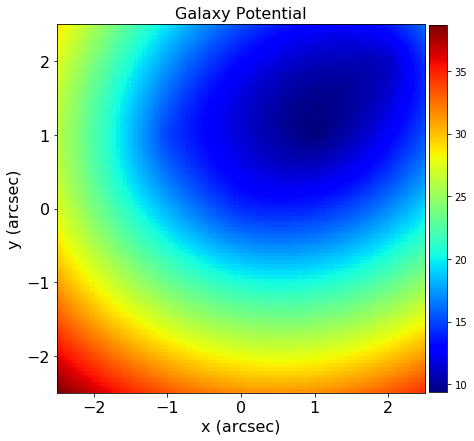

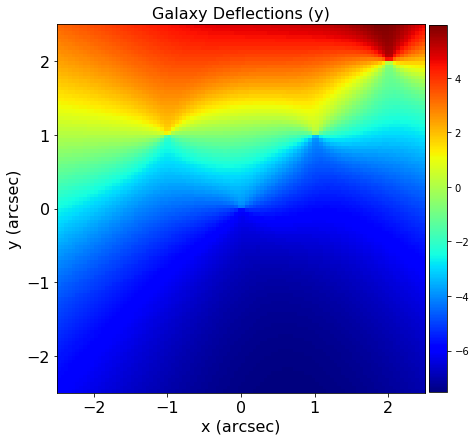

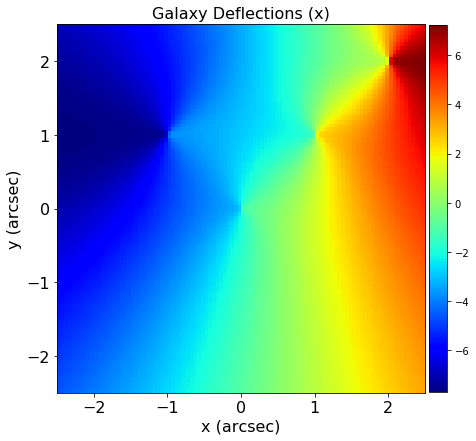

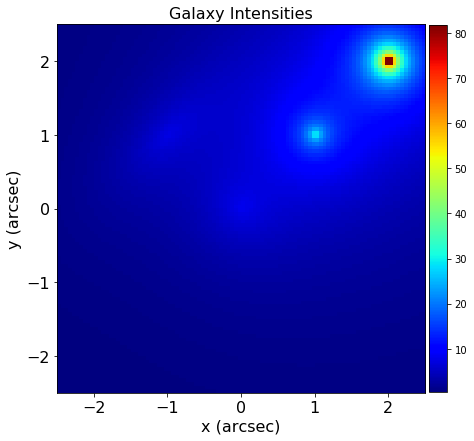

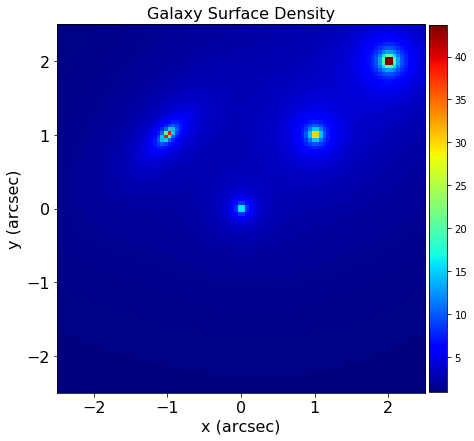

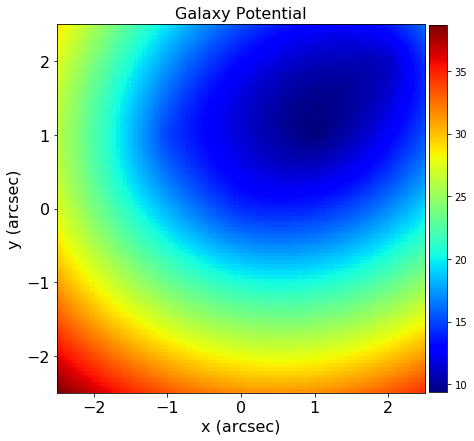

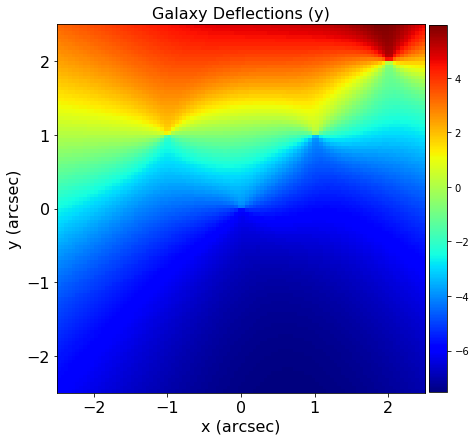

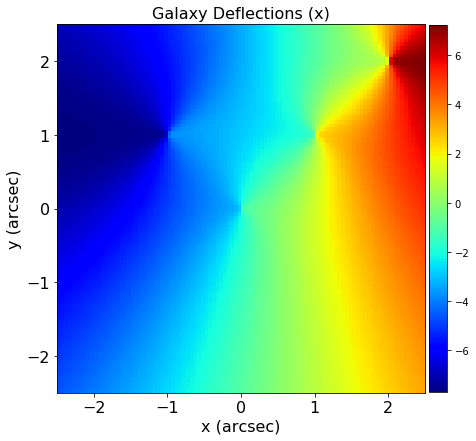

In [17]:
galaxy_plotters.plot_intensities(galaxy=galaxy_with_many_profiles, grid=grid_stack.regular)
galaxy_plotters.plot_surface_density(galaxy=galaxy_with_many_profiles, grid=grid_stack.regular)
galaxy_plotters.plot_potential(galaxy=galaxy_with_many_profiles, grid=grid_stack.regular)
galaxy_plotters.plot_deflections_y(galaxy=galaxy_with_many_profiles, grid=grid_stack.regular)
galaxy_plotters.plot_deflections_x(galaxy=galaxy_with_many_profiles, grid=grid_stack.regular)

And we're done. Lets finished by just thinking about one question:

1) We've learnt we can group profiles into galaxies, to essentially sum the contribution of each light profile to the galaxy image's intensity, or sum the contribution of each mass profile to the surface density, potential and deflection angles. In strong lensing, there are often multiple galaxies next to one another responsible for the lensing - how might we account for this?